In [3]:
# Importando librerías
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point


In [4]:
# Leyendo el dataset
geo_dataset = pd.read_csv('./Datasets/olist_geolocation_dataset.csv')

In [5]:
# Mostramos la dimensión del dataset
geo_dataset.shape

(1000163, 5)

In [6]:
# Mostrando 10 primers registros.
geo_dataset.head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


# Revisando las coordenadas en el mapa

In [7]:
# Importanto coordenadas de los paises del mundo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
world = world.set_index("iso_a3")

In [8]:
# Agregando una nueva columna uniendo la longitud y la latitud como tipo de dato POINT
geo_dataset["coordenadas"] = list(zip(geo_dataset.geolocation_lng, geo_dataset.geolocation_lat))
geo_dataset["coordenadas"] = geo_dataset["coordenadas"].apply(Point)
geo_dataset.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,coordenadas
0,1037,-23.545621,-46.639292,sao paulo,SP,POINT (-46.63929204800168 -23.54562128115268)
1,1046,-23.546081,-46.644820,sao paulo,SP,POINT (-46.64482029837157 -23.54608112703553)
2,1046,-23.546129,-46.642951,sao paulo,SP,POINT (-46.64295148361138 -23.54612896641469)
3,1041,-23.544392,-46.639499,sao paulo,SP,POINT (-46.63949930627844 -23.5443921648681)
4,1035,-23.541578,-46.641607,sao paulo,SP,POINT (-46.64160722329613 -23.54157796171149)


In [9]:
# Extrayendo las coordenadas del mapa de Brasil
world_brazil = world['geometry'].loc[world['name'] == 'Brazil']
world_brazil

iso_a3
BRA    POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...
Name: geometry, dtype: geometry

In [10]:
# Convirtiendo el dataframe geo_dataset en dataframe de geopandas e indicando que la columna geométrica es 'coordenadas'.
gdf = gpd.GeoDataFrame(geo_dataset, geometry="coordenadas")
gdf.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,coordenadas
0,1037,-23.545621,-46.639292,sao paulo,SP,POINT (-46.63929 -23.54562)
1,1046,-23.546081,-46.644820,sao paulo,SP,POINT (-46.64482 -23.54608)
2,1046,-23.546129,-46.642951,sao paulo,SP,POINT (-46.64295 -23.54613)
3,1041,-23.544392,-46.639499,sao paulo,SP,POINT (-46.63950 -23.54439)
4,1035,-23.541578,-46.641607,sao paulo,SP,POINT (-46.64161 -23.54158)


In [11]:
print('El tiepo de dato de gfd:', type(gdf))
print('\nLa clumna geométrica es:', gdf.geometry.name)

El tiepo de dato de gfd: <class 'geopandas.geodataframe.GeoDataFrame'>

La clumna geométrica es: coordenadas


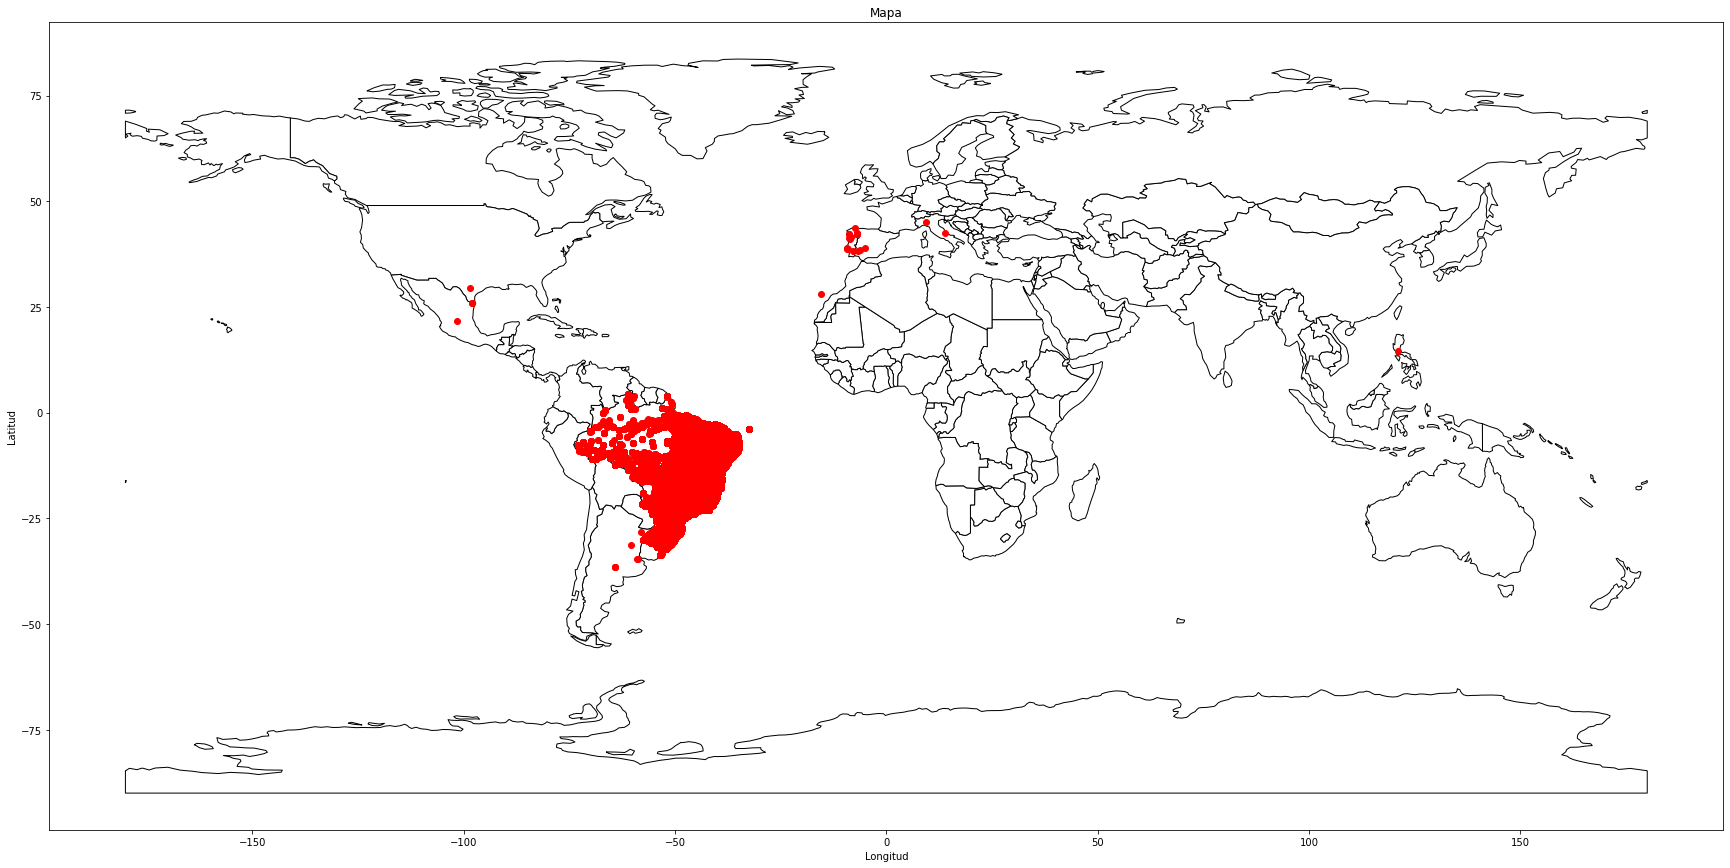

In [12]:
# Mostrando los puntos de coordenadas del dataset en el mapa.
fig, gax = plt.subplots(figsize=(30,30))

world.plot(ax = gax, edgecolor='black', color='white')
gdf.plot(ax=gax, color='red', alpha = 1)

gax.set_xlabel('Longitud')
gax.set_ylabel('Latitud')
gax.set_title('Mapa')

# gax.spines['top'].set_visible(False)
# gax.spines['right'].set_visible(False)

plt.show()

In [13]:
gdf_filtrado = gdf.copy()
gdf_filtrado

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,coordenadas
0,1037,-23.545621,-46.639292,sao paulo,SP,POINT (-46.63929 -23.54562)
1,1046,-23.546081,-46.644820,sao paulo,SP,POINT (-46.64482 -23.54608)
2,1046,-23.546129,-46.642951,sao paulo,SP,POINT (-46.64295 -23.54613)
3,1041,-23.544392,-46.639499,sao paulo,SP,POINT (-46.63950 -23.54439)
4,1035,-23.541578,-46.641607,sao paulo,SP,POINT (-46.64161 -23.54158)
...,...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS,POINT (-52.01071 -28.06864)
1000159,99900,-27.877125,-52.224882,getulio vargas,RS,POINT (-52.22488 -27.87713)
1000160,99950,-28.071855,-52.014716,tapejara,RS,POINT (-52.01472 -28.07186)
1000161,99980,-28.388932,-51.846871,david canabarro,RS,POINT (-51.84687 -28.38893)


In [14]:
# Agregamos una columna para filtrar por True si la coordenada pertenece a Brasil y False si no pertenece a Brasil.
gdf_filtrado['filtrado'] = [True if world_brazil[0].contains(point) else False for point in gdf_filtrado['coordenadas']]
gdf_filtrado

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,coordenadas,filtrado
0,1037,-23.545621,-46.639292,sao paulo,SP,POINT (-46.63929 -23.54562),True
1,1046,-23.546081,-46.644820,sao paulo,SP,POINT (-46.64482 -23.54608),True
2,1046,-23.546129,-46.642951,sao paulo,SP,POINT (-46.64295 -23.54613),True
3,1041,-23.544392,-46.639499,sao paulo,SP,POINT (-46.63950 -23.54439),True
4,1035,-23.541578,-46.641607,sao paulo,SP,POINT (-46.64161 -23.54158),True
...,...,...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS,POINT (-52.01071 -28.06864),True
1000159,99900,-27.877125,-52.224882,getulio vargas,RS,POINT (-52.22488 -27.87713),True
1000160,99950,-28.071855,-52.014716,tapejara,RS,POINT (-52.01472 -28.07186),True
1000161,99980,-28.388932,-51.846871,david canabarro,RS,POINT (-51.84687 -28.38893),True


In [15]:
# Hacemos un coteo de True y False.
gdf_filtrado['filtrado'].value_counts()

True     980575
False     19588
Name: filtrado, dtype: int64

In [18]:
gdf_filtrado[~gdf_filtrado['filtrado']]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,coordenadas,filtrado
256707,11612,-23.826105,-45.435803,sao sebastiao,SP,POINT (-45.43580 -23.82610),False
256709,11630,-23.831823,-45.373685,ilhabela,SP,POINT (-45.37369 -23.83182),False
256713,11630,-23.826931,-45.371054,ilhabela,SP,POINT (-45.37105 -23.82693),False
256716,11630,-23.822804,-45.376444,ilhabela,SP,POINT (-45.37644 -23.82280),False
256720,11630,-23.815880,-45.359177,ilhabela,SP,POINT (-45.35918 -23.81588),False
...,...,...,...,...,...,...,...
996197,99010,-28.622892,-56.026167,passo fundo,RS,POINT (-56.02617 -28.62289),False
996198,99010,-28.623859,-56.028473,passo fundo,RS,POINT (-56.02847 -28.62386),False
996224,99010,-28.622810,-56.025688,passo fundo,RS,POINT (-56.02569 -28.62281),False
996249,99010,-28.622629,-56.025312,passo fundo,RS,POINT (-56.02531 -28.62263),False


In [16]:
# Sólo nos quedamos con los registros que son True
gdf_filtrado_true = gdf_filtrado.loc[gdf_filtrado['filtrado'] == True]
gdf_filtrado_true.shape

(980575, 7)

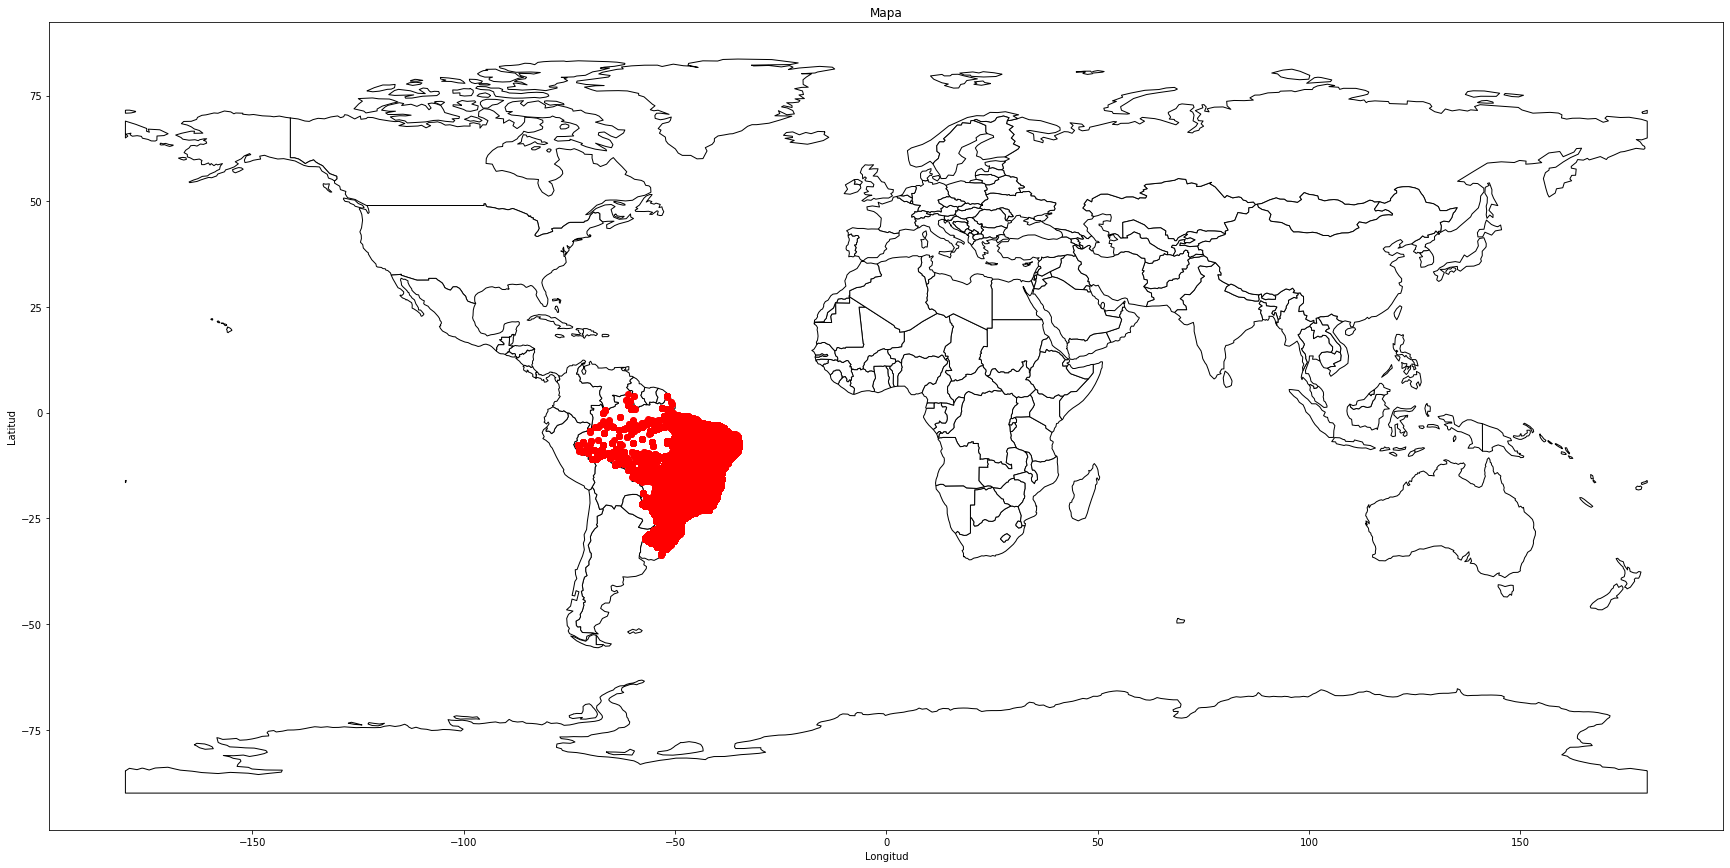

In [17]:
# Mostramos las coordenadas filtradas por True del dataset.
fig, gax = plt.subplots(figsize=(30,30))

world.plot(ax = gax, edgecolor='black', color='white')
gdf_filtrado_true.plot(ax=gax, color='red', alpha = 1)

gax.set_xlabel('Longitud')
gax.set_ylabel('Latitud')
gax.set_title('Mapa')

# gax.spines['top'].set_visible(False)
# gax.spines['right'].set_visible(False)

plt.show()